In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#pd.options.display.precision = 2

url = 'https://raw.githubusercontent.com/RicardoASantos1234/DataSets/main/AB_NYC_2019.csv'
#import dataset
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.columns.unique()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], dtype='object')

In [3]:
df1 = df.drop(columns = ['name', 'id', 'host_id', 'host_name', 'latitude', 'longitude',  'neighbourhood',\
                         'last_review'])

neighbourhood_group_mapping = df1.neighbourhood_group.astype('category')
df1['neighbourhood_group']= neighbourhood_group_mapping.cat.codes
room_type_group_mapping = df1.room_type.astype('category')
df1['room_type']= room_type_group_mapping.cat.codes


In [4]:
df1.describe()
#average listing price is around 152
#there are 48895 rows of data
#the highest listing price is $10,000.00
#the lowest listing price is $0.00

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.675345,0.504060,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.735816,0.545379,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.000000,0.000000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,2.000000,0.000000,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.000000,1.000000,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,4.000000,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#room_type_g = df1.groupby('room_type')
#room_type_avg_price = room_type_g['price'].mean()
#room_type_avg_price

#the average listing price for Entire home/apt is $211.79
#the average listing price for Private room is $89.78
#the average listing price for Shared room is $70.12

#from this we can assume that as you gain privacy/living space in your rental, the prices go up
#more room and or privacy calls for a higher rental premium


#neighbourhood_group_g = df1.groupby('neighbourhood_group')
#neighbourhood_group_avg_price = neighbourhood_group_g['price'].mean()
#neighbourhood_group_avg_price



#the average listing price for Manhattan is $196.88
#the average listing price for Brooklyn is $124.44
#the average listing price for Staten Island is $114.81
#the average listing price for Queens is $99.51
#the average listing price for Bronx is $87.58

#from this we can assume that Manhattan realeastate has the highest premium and the Bronx has the lowest
#average listing prices

#function to convert date column last_review to individual columns year, month, day
#def f(df):
#    df = df.copy()
#    df['Year'] = pd.DatetimeIndex(df['last_review']).year
#    df['Month'] = pd.DatetimeIndex(df['last_review']).month
#    df['Day'] = pd.DatetimeIndex(df['last_review']).day
#    return df
#CREATE DATAFRAME WITH CREATED DATE COLUMNS
#df1 = f(df1)
#df1

#FILTER DATA FOR ONLY DATA THAT HAD LAST REVIEWS IN 2019
#test = df1[df1['Year']>= 2019]

#GROUP DATA BY ROOM TYPE AND THEN BY YEAR
#test_group = test.groupby(['room_type','Year'])
#GENERATE COUNT FOR THE GROUP
#test_group_count = test_group.count()
#GENERATE PRICE MEANS FOR THE GORUP
#price_test = test_group.price.mean()
#price_test
#test_group_count

In [6]:
#neighbourhood_group_mapping = df1.neighbourhood_group.astype('category')
#df1['neighbourhood_group']= neighbourhood_group_mapping.cat.codes
#room_type_group_mapping = df1.room_type.astype('category')
#df1['room_type']= room_type_group_mapping.cat.codes

In [7]:
df1 = df1.fillna(0)

In [8]:
df1

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1,149,1,9,0.21,6,365
1,2,0,225,1,45,0.38,2,355
2,2,1,150,3,0,0.00,1,365
3,1,0,89,1,270,4.64,1,194
4,2,0,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,1,1,70,2,0,0.00,2,9
48891,1,1,40,4,0,0.00,2,36
48892,2,0,115,10,0,0.00,1,27
48893,2,2,55,1,0,0.00,6,2


In [22]:
#outlier function to find lower and upper fence of values to find outliers
def outlier_treatment(datacolumn):
    datacolumn = sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [23]:
#find lower and upperbound of prices
lowerbound,upperbound = outlier_treatment(df1.price)

In [26]:
#find number of outliers in prices column by comparing to found lower and upper bound
df1[(df1.price < lowerbound) | (df1.price > upperbound)].count()

neighbourhood_group               2972
room_type                         2972
price                             2972
minimum_nights                    2972
number_of_reviews                 2972
reviews_per_month                 2972
calculated_host_listings_count    2972
availability_365                  2972
dtype: int64

In [27]:
#dropping outliers from dataset
df1.drop(df1[ (df1.price > upperbound) | (df1.price < lowerbound) ].index , inplace=True)

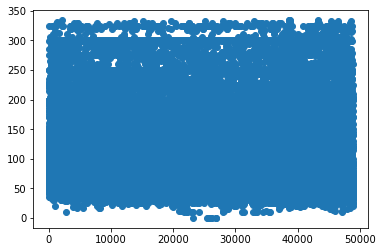

In [29]:
#scatter plot of prices after dropping outliers
plt.plot(df1.price, 'o')

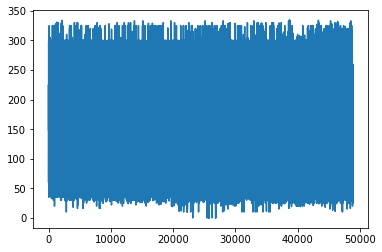

In [30]:
plt.plot(df1.price)

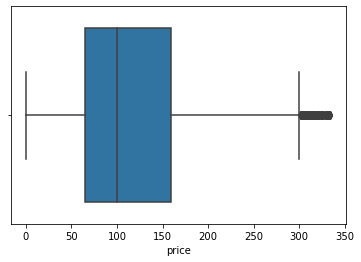

In [31]:
import seaborn as sns
sns.boxplot(x=df1['price'])

In [32]:
df1.describe()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000
mean,1.667748,0.528537,119.970320,6.938070,23.942665,1.107739,6.639701,109.378699
std,0.747402,0.546583,68.150148,19.857823,45.315219,1.612657,31.008148,130.279393
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,65.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,2.000000,1.000000,100.000000,2.000000,5.000000,0.380000,1.000000,39.000000
75%,2.000000,1.000000,159.000000,5.000000,24.000000,1.620000,2.000000,217.000000
max,4.000000,2.000000,334.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [33]:

####################################################################################
####################################################################################
#################generate a baseline for our model#################################
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df1.drop('price', axis = 1)
Y = df1['price']
scaler = StandardScaler().fit(X)
x_scaled = scaler.transform(X)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_scaled, Y)

scaled_prediction_input = scaler.transform(X[12:13])
pred = model.predict(scaled_prediction_input)
print('my actual was ', df.price.iloc[13], ' my pred is ', pred)

my actual was  85  my pred is  [84.87512973]


In [34]:
print(model.coef_)
#####################end of baseline for our model##################################
####################################################################################
####################################################################################
####################################################################################

[  3.91581292 -41.11081013  -3.10173124  -1.40172912  -2.68458645
   6.25044471   5.6989391 ]


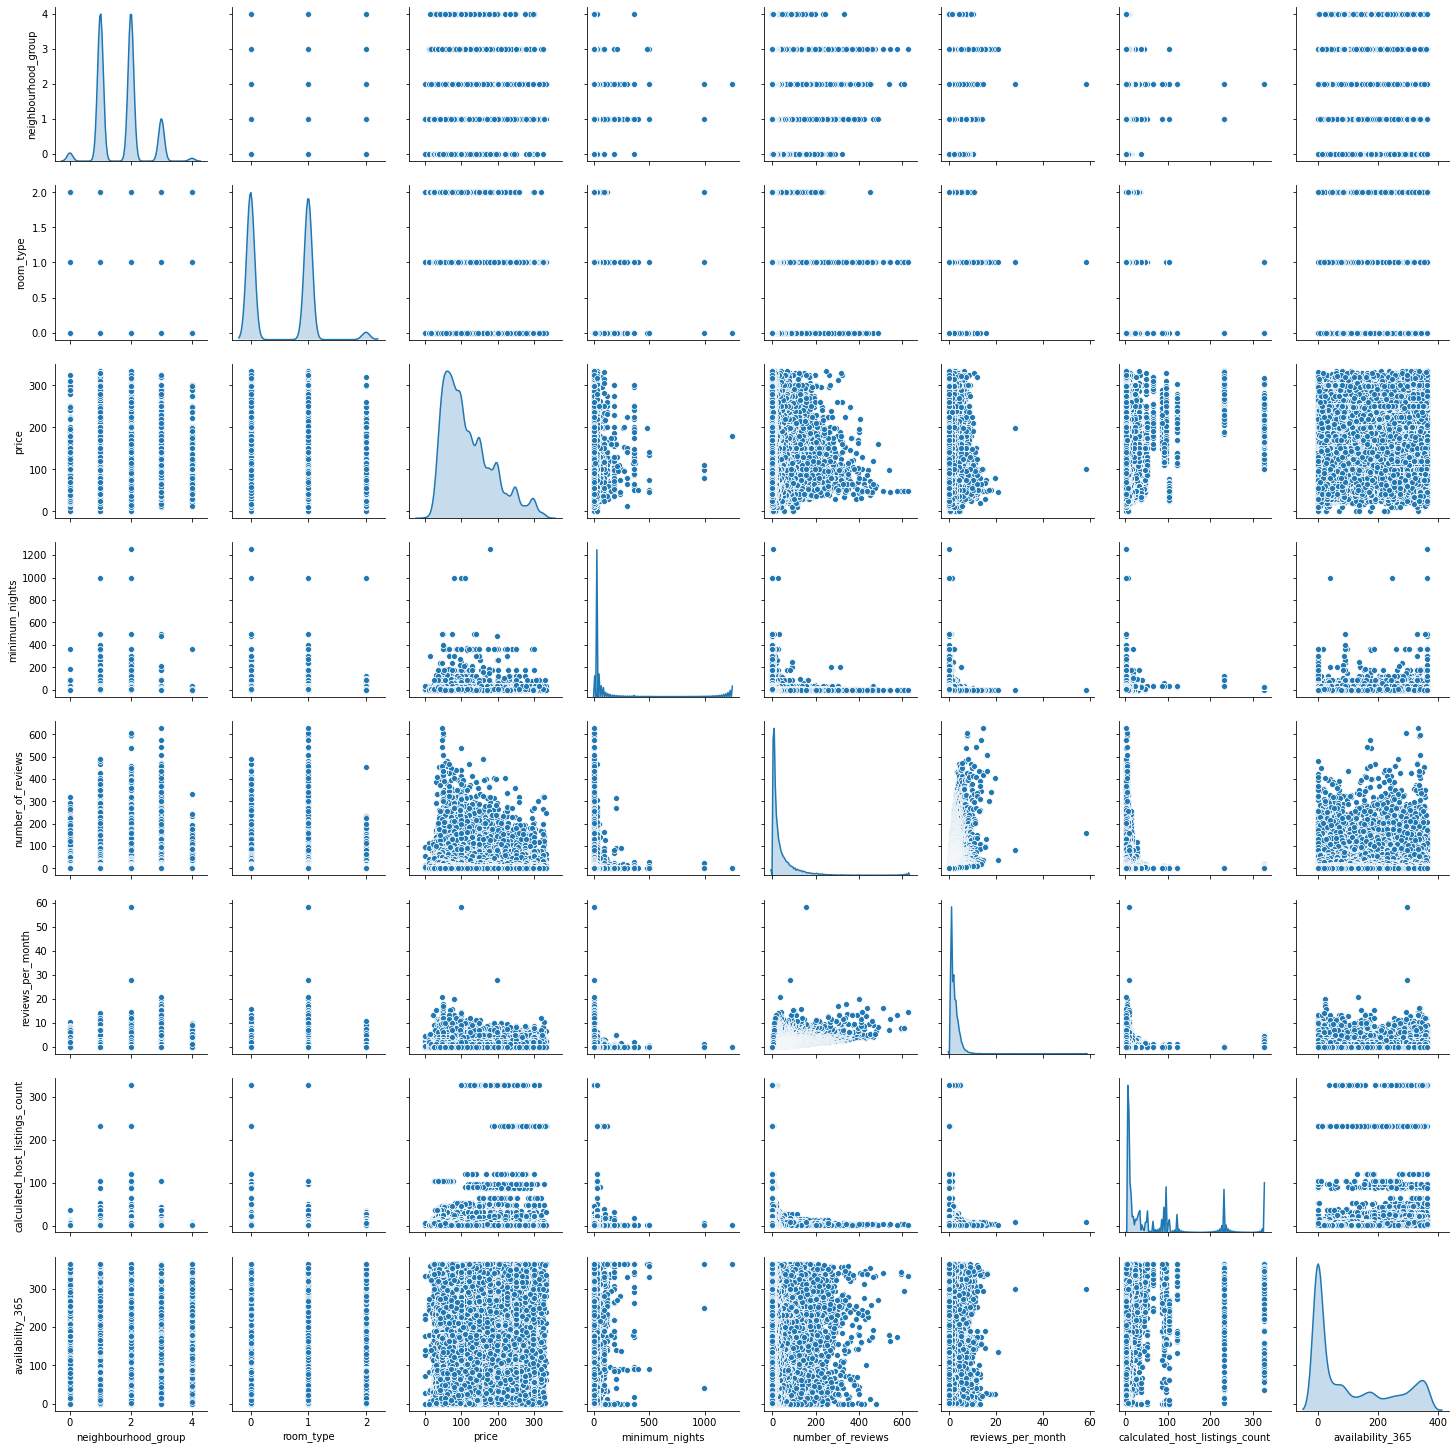

In [35]:
#neighbourhood_group_mapping = df1.neighbourhood_group.astype('category')
#df1['neighbourhood_group']= neighbourhood_group_mapping.cat.codes
#room_type_group_mapping = df1.room_type.astype('category')
#df1['room_type']= room_type_group_mapping.cat.codes

import seaborn as sns
sns.pairplot(df1[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']], diag_kind = 'kde')

In [39]:
from sklearn.model_selection import train_test_split
X = df1.drop('price', axis = 1)
Y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=66, test_size=0.2)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
x_scaled_train=scaler.transform(X_train)
x_scaled_test = scaler.transform(X_test)

In [41]:
x_scaled_train.shape

(36738, 7)

In [109]:
import tensorflow as tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(380, activation='relu', kernel_regularizer=regularizers.l2(0.1), input_shape=(x_scaled_train.shape[1],)))

model.add(layers.Dense(440, kernel_regularizer=regularizers.l2(0.1), activation='relu'))

model.add(layers.Dense(160,  activation='relu'))

model.add(layers.Dense(160,  activation='relu'))

model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.1), activation='relu'))

model.add(layers.Dense(1, kernel_regularizer=regularizers.l2(0.1), activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

Epoch 1/30
15/15 [==============================] - 2s 67ms/step - loss: 18866.8224 - mean_absolute_error: 118.9945 - val_loss: 15892.1387 - val_mean_absolute_error: 106.6855
Epoch 2/30
15/15 [==============================] - 1s 56ms/step - loss: 13135.6763 - mean_absolute_error: 91.6112 - val_loss: 6885.2852 - val_mean_absolute_error: 58.1003
Epoch 3/30
15/15 [==============================] - 1s 49ms/step - loss: 5433.4204 - mean_absolute_error: 52.6892 - val_loss: 3744.8914 - val_mean_absolute_error: 45.1189
Epoch 4/30
15/15 [==============================] - 1s 48ms/step - loss: 3773.3148 - mean_absolute_error: 45.6824 - val_loss: 3244.9619 - val_mean_absolute_error: 41.9222
Epoch 5/30
15/15 [==============================] - 1s 48ms/step - loss: 3363.5463 - mean_absolute_error: 43.1174 - val_loss: 3084.8752 - val_mean_absolute_error: 41.0700
Epoch 6/30
15/15 [==============================] - 1s 50ms/step - loss: 3214.6776 - mean_absolute_error: 42.0295 - val_loss: 2960.2334 - va

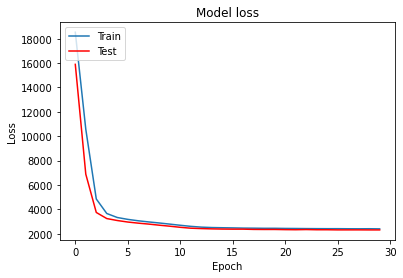

In [110]:
#fit the model to scaled train and test data
history = model.fit(x_scaled_train, y_train, epochs=30, batch_size = 2500, validation_data= (x_scaled_test, y_test))


In [112]:
#evaluate model to see final training and validation loss as well as mean absolute error
model.evaluate(x_scaled_train, y_train)
model.evaluate(x_scaled_test, y_test)


288/288 [==============================] - 1s 2ms/step - loss: 2313.7327 - mean_absolute_error: 35.1168


[2313.732666015625, 35.116825103759766]

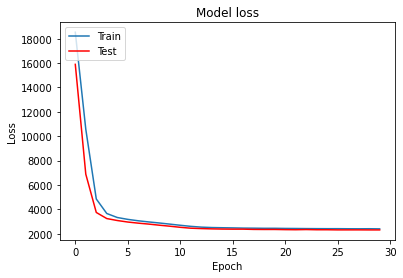

In [113]:
#checking training vs test loss curve to ensure no over or underfitting
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], c='r')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [ ]:
#after removing outliers and scaling data the linear regression model is able to achieve a training loss of
# 2398.3516 and a validation loss of 2313.7327 as well as a training mean absolute error of 35.6285 and a 
# validation mean absolute error of 35.1168. So the model is able to predict price of AirBnB listing with a 
# potential error of plus or minus 35 dollars. This mean absolute error can be the difference of booking 
# fees for AirBnb, which is a realistic variance.